In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [57]:
dataset = pd.read_csv('/home/anna/Desktop/ML Optimization/CovariateStableReg/abalone_original.csv')

In [58]:
dataset

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [66]:
def plot_data(X, X_shift):
    sns.set(style="whitegrid")
    num_covariates = X.shape[1]

    # Create a grid of subplots
    fig, axes = plt.subplots(1, num_covariates, figsize=(25, 5))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        # Plot for Covariate i in both datasets
        sns.histplot(X[:, i], kde=True, color='blue', label='Original', alpha=0.7, ax=ax)
        sns.histplot(X_shift[:, i], kde=True, color='orange', label='Shifted', alpha=0.7, ax=ax)
        
        ax.set_title(f'Distribution of Covariate {i}')
        ax.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [67]:
X = dataset.drop(['sex', 'rings'], axis=1)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [68]:
features_to_shift = ['length', 'diameter', 'height', 'whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
column_indices = [X.columns.get_loc(col) for col in features_to_shift]
X_train_shifted = X_normalized.copy()
shift_values = np.random.uniform(low=0, high=2, size=(X.shape[0], len(features_to_shift)))
X_train_shifted[:, column_indices] = X_train_shifted[:, column_indices] + shift_values

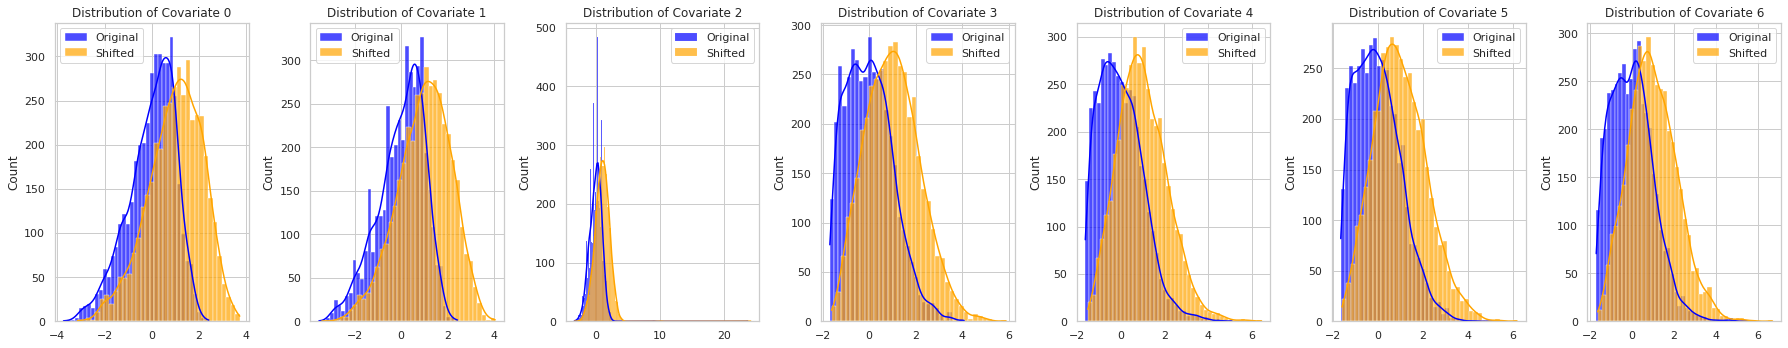

In [69]:
plot_data(X_normalized, X_train_shifted)

In [72]:
# save dataframe
shifted_dataset = dataset.copy()
shifted_dataset[features_to_shift] = X_train_shifted
shifted_dataset.to_csv("shifted_normalized_abalone.csv")

In [74]:
!ls

sandbox  shifted_normalized_abalone.csv
